# Binomial Distribution

In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes (preferred outcomes) in a sequence of n independent trials, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p). A single success/failure experiment is also called a Bernoulli trial, and a sequence of outcomes is called a Bernoulli process or Bernoulli experiment. The binomial distribution is the basis for the popular binomial test of statistical significance. In this article instead of using the terms successes or failure we will use the terms Heads or Tails so that we can have a neutral opinions on the outcomes of events.

## Bernoulli trial

Let's say you have a fair coin and then you toss it, the act of tossing and seeing the result as $Heads$ or $Tails$ is considered a Bernoulli trial. Let's say you toss the coin 4 times in a row then we say it's a Bernoulli process with $n=4$ trails. Also, we said we are considering a fair coin which means the chances of getting $Heads$ or $Tails$ is equally likely. Let's capture this coin fairness as $p$. $p=0.5$ represents both $Heads$ or $Tails$ have 50% chance of occurrence. If $p=0.2$ then we say $Heads$ has 20% chance of occurrence and $Tails$ has $1-p$ ie 0.8 or 80% chance of occurrence.



Let's say we have a cup and its holding White and Black beads. We randomly pick a bead, we make a note of the color and put it back. If we keep repeating the process for a large amount of time. The ratio of the counts of black and white beads we notice will converge to the true ratio of the quantity of White and Black beads inside the cup. We can programatically model it as follows.

In [17]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import math

W/B: 1.520656365790336


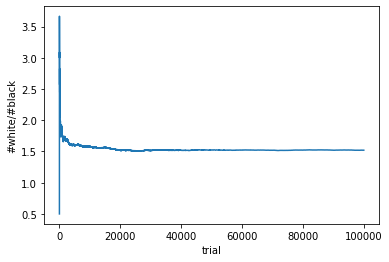

In [18]:

# A cup containing some number of white and black beads. 
cup = ['W', 'B', 'W', 'W', 'B']

# outcomes counter to count what we observe on random sampling.
outcomes = [1, 1]
ratios = []
for i in range(0, 100000):
    bead = random.choice(cup)
    if bead == 'W':
        outcomes[0] += 1
    else:
        outcomes[1] += 1
    data = {'trial': i, '#white/#black': outcomes[0]/outcomes[1]}
    ratios.append(data)

_data = pd.DataFrame(ratios)
sns.lineplot(x="trial", y="#white/#black", data=_data)
print('W/B:', outcomes[0]/outcomes[1]) 

Bernoulli concluded that if we observe everything in the universe for infinite amount of time, everything will converge to some ratios. This become a backbone to what we now call as central limit theorm. Critics of this idea argued that independence between each trial is a necessary conditions for convergence. Ie, if I pick a white bead it shouldn't influence the next outcome in anyway. Also, on the other hand natual world has events which are depenedent on each other ie. natural world has no true independent events. Later a mathematican Andrey Markov showed event in the case of depenedent events the ratios between the events will converge to some value if the trails are run till infinity. This idea came out as Markov chains. These ideas play an important roles in foundations of information theory. Before if we explore those ideas we need to be familiar with independent outcomes for a two state system ie. a coin flip.

We can programmatically represent a coin flip as follows.

In [19]:
bernoulli_trial = lambda p: random.choices(['H', 'T'], weights=[p, 1-p])

In this article, I will call a Bernoulli process (the process of tossing a coin n times) as an experiment as its easy to get the idea around.

In [7]:
def run_a_bernoulli_experiment(N=4, p=0.5):
    data = {}
    for n in range(1, N+1):
        result = bernoulli_trial(p=0.5)
        data[f't_{n}'] = result
    return pd.DataFrame(data)

results = run_a_bernoulli_experiment(N=4, p=0.5)


What we did above is that we conducted one bernoulli expriment with  𝑁=4  trials. In simple english, we tossed a coin 4 times. Let's see the results.

In [8]:
print(results)

  t_1 t_2 t_3 t_4
0   T   H   T   T


Now, Let's ask a question, if I run a Bernoulli trial with $N=4$ or $N=5$ or $N=6$ and so on, what are the odds of getting all $Heads$ or what are the odds of getting two $Heads$ and three $Tails$, what are the odds of getting three $Heads$ and four $Tails$, well you get the idea.

<b>
In general, If I run a Bernoulli experiment with $N$ trials, what are the odds of seeing $k$ $Heads$ and $N-K$ $Tails$?
</b>


To pursue an answer to this question, Let's run five Bernoulli experiments.

In [9]:
num_exp = 5
outcomes = []
for i in range(0, num_exp):
    outcomes.append(run_a_bernoulli_experiment(N=4, p=0.5))
res = results.append(outcomes, ignore_index=True)
print(res)

  t_1 t_2 t_3 t_4
0   T   H   T   T
1   H   H   H   T
2   H   H   H   T
3   T   T   H   H
4   H   H   H   H
5   T   T   T   H


We can see at each trail the number of $Heads$ and $Tails$ keep changing and this is conditioned on the fairness of coin $p$ if the coin was biased to $Heads$ ie. $p > (1-p)$ then we would have seen more $Heads$ count than tails. Let's repeat the same experiment with an unfair coin and also let's count how many $Heads$ and $Tails$ we get.

In [10]:
bernoulli_trial = lambda p: random.choices(['H', 'T'], weights=[p, 1-p])

def run_a_bernoulli_experiment(n=5, p=0.5):
    data = {}
    count = {'H': 0, 'T': 0}
    for trial in range(1, n+1):
        result = bernoulli_trial(p=0.5)
        count[result[0]] += 1
        data[f't_{trial}'] = result
    data[f'H_count'] = count['H']
    data[f'T_count'] = count['T']
    return pd.DataFrame(data)

def run_bernoulli_experiments(num_of_exp=1, n=5, p=0.5):
    results = None
    outcomes = []
    for i in range(0, num_of_exp):
        if i == 0:
            results = run_a_bernoulli_experiment(n=5, p=0.5)
        else:
            outcomes.append(run_a_bernoulli_experiment(n=5, p=0.5))
    if outcomes:
        results.append(outcomes, ignore_index=True)
    return results

In [11]:
outcomes = run_bernoulli_experiments(num_of_exp=1, n=5, p=0.5)
print(outcomes)

  t_1 t_2 t_3 t_4 t_5  H_count  T_count
0   H   T   H   T   H        3        2


Now let's visit the original question back, If I run a bernoulli trial with $N=5$ what are the odds of getting all $4 Heads$ and $ 1Tails$? To answer this, I will list all possible scenerios the outcomes can be. If $N=5$, then we can have $0 Heads$, $5 Tails$ as an outcome, or $1 Heads$, $4 Tails$ as an outcome or $2 Heads$, $3 Tails$ or.. $5 Heads$, $0 Tails$

| id | Hcount | Tcount | TOTAL N = 5 | Combinations ${}^{5}C_{Hcount}$
| --- | --- | --- | --- | --- |
| id_0 | 0 | 5 | 5 | ${}^{5}C_{0}$ = 1
| id_1 | 1 | 4 | 5 | ${}^{5}C_{1}$ = 5
| id_2 | 2 | 3 | 5 | ${}^{5}C_{2}$ = 10
| id_3 | 3 | 2 | 5 | ${}^{5}C_{3}$ = 10
| id_4 | 4 | 1 | 5 | ${}^{5}C_{4}$ = 5
| id_5 | 5 | 0 | 5 | ${}^{5}C_{5}$ = 1

out of all the above outcomes we are interested in the id_4 ie. $4 Heads$ and $ 1Tails$ and there are only 5 ways it can occur. Here are all the outcomes for the case 4 heads and 1 tail.

| Tails 1| Tails 2| Tails 3| Tails 4| Tails 5|
| --- | --- | --- | --- | --- |
| H | H | H | H | T |
| H | H | H | T | H |
| H | H | T | H | H |
| H | T | H | H | H |
| T | H | H | H | H |

Note all the above tables are independent of the coin's bias. Now, if I say that the coin has the probability of giving head as a result of 0.8 then we can re-write the above table as this.

| Tails 1| Tails 2| Tails 3| Tails 4| Tails 5| Probablity of this sequence of event
| --- | --- | --- | --- | --- | --- |
| 0.8 | 0.8 | 0.8 | 0.8 | 0.2 | 0.8192 |
| 0.8 | 0.8 | 0.8 | 0.2 | 0.8 | 0.8192 |
| 0.8 | 0.8 | 0.2 | 0.8 | 0.8 | 0.8192 |
| 0.8 | 0.2 | 0.8 | 0.8 | 0.8 | 0.8192 |
| 0.2 | 0.8 | 0.8 | 0.8 | 0.8 | 0.8192 |

Or, we can re write the above table with a formula

| Tails 1| Tails 2| Tails 3| Tails 4| Tails 5| $p^k$ x $q^{n-k}$|
| --- | --- | --- | --- | --- | --- |
| 0.8 | 0.8 | 0.8 | 0.8 | 0.2 | 0.8192 |
| 0.8 | 0.8 | 0.8 | 0.2 | 0.8 | 0.8192 |
| 0.8 | 0.8 | 0.2 | 0.8 | 0.8 | 0.8192 |
| 0.8 | 0.2 | 0.8 | 0.8 | 0.8 | 0.8192 |
| 0.2 | 0.8 | 0.8 | 0.8 | 0.8 | 0.8192 |


Now we can combine this with our original table

| id | Hcount | Tcount | TOTAL N = 5 | Combinations| ${}^{5}C_{k}$ x $p^k$ x $q^{n-k}$|
| --- | --- | --- | --- | --- | --- |
| id_0 | 0 | 5 | 5 | ${}^{5}C_{0}$ = 1 | 0.00032|
| id_1 | 1 | 4 | 5 | ${}^{5}C_{1}$ = 5 | 0.064|
| id_2 | 2 | 3 | 5 | ${}^{5}C_{2}$ = 10 | 0.0512|
| id_3 | 3 | 2 | 5 | ${}^{5}C_{3}$ = 10 | 0.2048|
| id_4 | 4 | 1 | 5 | ${}^{5}C_{4}$ = 5 | 0.4092|
| id_5 | 5 | 0 | 5 | ${}^{5}C_{5}$ = 1 | 0.32768|

We will run the run_bernoulli_experiments as we did above and let's fill this table the actual outcomes from experiment.

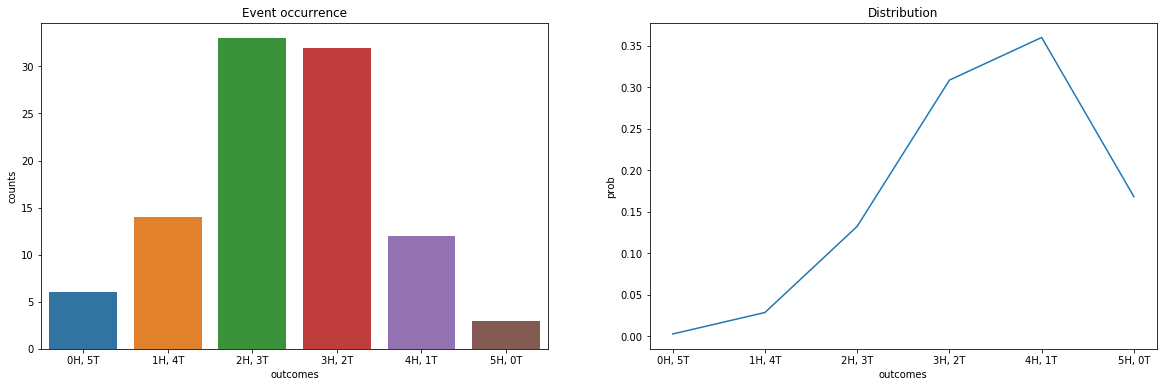

In [12]:
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

class BernoulliDistribution:
    def __init__(self, n=4):
        self.n = n
        self.num_of_exp = 0
        self.p = 0
    
    def run_a_bernoulli_experiment(self, p=0.5):
        bernoulli_trial = lambda p: random.choices(['H', 'T'], weights=[p, 1-p])
        
        data = {}
        count = {'H': 0, 'T': 0}
        for trial in range(0, self.n):
            result = bernoulli_trial(p=0.5)
            count[result[0]] += 1
            data[f't_{trial+1}'] = result
        data[f'H_count'] = count['H']
        data[f'T_count'] = count['T']
        data[f'n'] = count['H'] + count['T']
        data['outcome'] = f"{count['H']}H,{count['T']}T"
        
        return pd.DataFrame(data)
    
    def get_outcomes_count(self, outcomes):
        counts = {}
        # Initialize count distribution
        for i in range(0, self.n+1):
            counts[f'{i}H, {self.n-i}T'] = 0
            
        # count distribution
        for i in range(len(outcomes)):
            counts[f'{outcomes.iloc[i].H_count}H, {outcomes.iloc[i].T_count}T'] += 1
        
        _outcomes = []
        _counts = []
        _event_probablity = []
        _probablities = []
        _cp = []
        _ncr = []
        head_count = 0
        tail_count = self.n
        for key, value in counts.items():
            _outcomes.append(key)
            _counts.append(value)
            _event_probablity.append(value/self.num_of_exp)
            binomial_prob = nCr(self.n, head_count) * (self.p ** head_count) * ((1-self.p) ** tail_count)
            #binomial_prob = binomial_prob / math.pow(2, self.n)
            _probablities.append(binomial_prob)
            _cp.append(nCr(self.n, head_count)/math.pow(2, self.n))
            _ncr.append(nCr(self.n, head_count))
            head_count += 1
            tail_count = self.n - head_count
        res = {'outcomes': _outcomes, 
               'counts': _counts,
               'counts/total_exp': _event_probablity,
               'nCr': _ncr,
               'nCr/2^n': _cp,
               'prob': _probablities}
        return pd.DataFrame(res)
    
    def plot_distribution(self, outcomes):
        # sns.histplot(outcomes, x='outcome')
        distribution = bd.get_outcomes_count(outcomes)
        fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=False, sharex=False)
        axes[0].set_title('Event occurrence')
        axes[1].set_title('Distribution')
        sns.barplot(x="outcomes", y="counts", data=distribution, ax=axes[0])
        sns.lineplot(x="outcomes", y="prob", data=distribution, ax=axes[1])
        return distribution
        
    
    def run_bernoulli_experiments(self, num_of_exp=1, p=0.5):
        results = None
        self.num_of_exp = num_of_exp
        self.p = p
        outcomes = []
        for i in range(0, num_of_exp):
            # print(f'Running experiment {i} with {self.n} trails')
            if i == 0:
                results = self.run_a_bernoulli_experiment(p)
            else:
                outcomes.append(self.run_a_bernoulli_experiment(p))
        return results.append(outcomes, ignore_index=True)
        
bd = BernoulliDistribution(n=5)
outcomes = bd.run_bernoulli_experiments(num_of_exp=100, p=0.7)
distribution = bd.plot_distribution(outcomes)

In [13]:
print(distribution)

  outcomes  counts  counts/total_exp   nCr  nCr/2^n     prob
0   0H, 5T       6              0.06   1.0  0.03125  0.00243
1   1H, 4T      14              0.14   5.0  0.15625  0.02835
2   2H, 3T      33              0.33  10.0  0.31250  0.13230
3   3H, 2T      32              0.32  10.0  0.31250  0.30870
4   4H, 1T      12              0.12   5.0  0.15625  0.36015
5   5H, 0T       3              0.03   1.0  0.03125  0.16807


Lets re run the above experiments with larger trails so we get a nice neat curves.

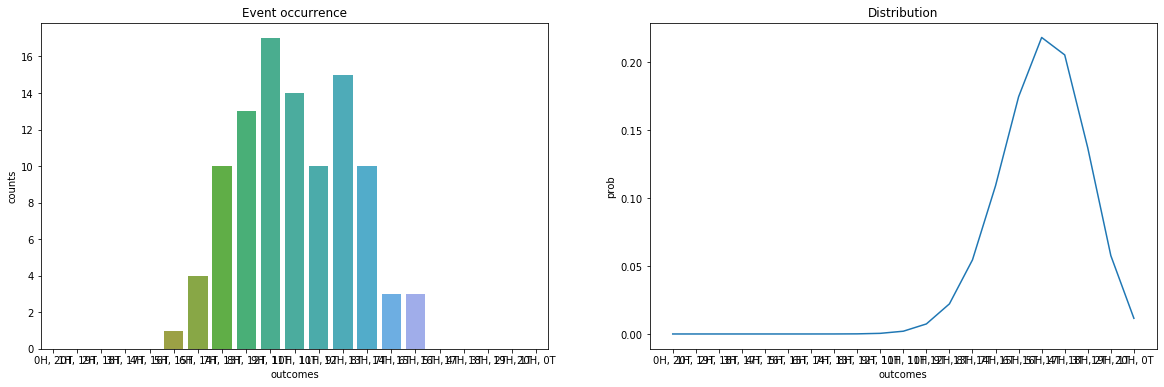

In [14]:
bd = BernoulliDistribution(n=20)
outcomes = bd.run_bernoulli_experiments(num_of_exp=100, p=0.8)
distribution = bd.plot_distribution(outcomes)

In [15]:
print(distribution)

    outcomes  counts  counts/total_exp       nCr       nCr/2^n          prob
0    0H, 20T       0              0.00       1.0  9.536743e-07  1.048576e-14
1    1H, 19T       0              0.00      20.0  1.907349e-05  8.388608e-13
2    2H, 18T       0              0.00     190.0  1.811981e-04  3.187671e-11
3    3H, 17T       0              0.00    1140.0  1.087189e-03  7.650410e-10
4    4H, 16T       0              0.00    4845.0  4.620552e-03  1.300570e-08
5    5H, 15T       1              0.01   15504.0  1.478577e-02  1.664729e-07
6    6H, 14T       4              0.04   38760.0  3.696442e-02  1.664729e-06
7    7H, 13T      10              0.10   77520.0  7.392883e-02  1.331783e-05
8    8H, 12T      13              0.13  125970.0  1.201344e-01  8.656592e-05
9    9H, 11T      17              0.17  167960.0  1.601791e-01  4.616849e-04
10  10H, 10T      14              0.14  184756.0  1.761971e-01  2.031414e-03
11   11H, 9T      10              0.10  167960.0  1.601791e-01  7.386959e-03

We can see that $nCr$ captures number of ways a sequence can happen and $2^n$ canptures all the possible sequences and experimentally counts/total_exp is almost same as $nCr/2^n$. 

Finally lets verify if the sums add up to ones.

In [16]:
print(sum(distribution['counts/total_exp']))
print(sum(distribution['nCr/2^n']))
print(sum(distribution.prob))

1.0
1.0
1.0


# Conclusion 




So, for a sequence of $n$ trials where each trail has a probablity of $p$ for a preferred occurrence. We can write that the probablity of seeing $k$ preffered events under binomial distribution as 

\begin{equation*}
{}^{n}C_k * p^k * (1-p)^{n-k}
\end{equation*}

These values play an important role in statistical significance test for binary variables as a $p_value$. $p_value$ on some observational data gives us confidence in the evidence gathered to discard a hypothesis. These are good topics for another article.